In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numbers as nm

In [2]:
marketing_data = pd.read_csv('expanded_marketing_data.csv')

In [3]:
marketing_data

,Customer_ID,Marketing_Channel,Acquisition_Cost,Revenue_First_30_Days,Customer_Lifetime_Value,Churned,Signup_Date,Region,Device,Age,Industry,Is_Repeat_Buyer,Engagement_Score
0,CUST00001,Organic Search,14.97,253.09,764.77,0,2024-11-19,Northeast,Mobile,40,Healthcare,1,82.85
1,CUST00002,Facebook Ads,39.89,225.36,639.26,0,2025-01-18,Midwest,Mobile,45,Logistics,0,46.06
2,CUST00003,Organic Search,5.00,233.74,642.86,0,2025-02-25,International,Desktop,46,Logistics,1,46.14
3,CUST00004,Email Campaign,5.00,215.71,409.20,0,2025-03-06,West,Mobile,24,Logistics,0,38.82
4,CUST00005,Facebook Ads,54.75,345.64,397.33,0,2024-11-24,Midwest,Mobile,23,Logistics,1,76.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST04996,Google Ads,72.44,220.94,671.17,1,2024-12-25,Pacific,Mobile,30,Consulting,1,24.09
4996,CUST04997,LinkedIn,96.46,316.27,739.42,0,2025-04-21,Pacific,Mobile,25,Consulting,1,48.38
4997,CUST04998,Facebook Ads,76.29,242.03,720.71,1,2024-12-09,Midwest,Mobile,30,Logistics,0,29.58
4998,CUST04999,LinkedIn,60.34,295.66,800.45,1,2025-01-17,Northeast,Desktop,63,Healthcare,1,49.64


In [4]:
marketing_data.columns

Index(['Customer_ID', 'Marketing_Channel', 'Acquisition_Cost',
       'Revenue_First_30_Days', 'Customer_Lifetime_Value', 'Churned',
       'Signup_Date', 'Region', 'Device', 'Age', 'Industry', 'Is_Repeat_Buyer',
       'Engagement_Score'],
      dtype='object')

In [5]:
marketing_data.isna().sum()

Customer_ID                0
Marketing_Channel          0
Acquisition_Cost           0
Revenue_First_30_Days      0
Customer_Lifetime_Value    0
Churned                    0
Signup_Date                0
Region                     0
Device                     0
Age                        0
Industry                   0
Is_Repeat_Buyer            0
Engagement_Score           0
dtype: int64

In [8]:
marketing_data.groupby('Marketing_Channel')['Customer_ID'].count()

Marketing_Channel
Email Campaign    837
Facebook Ads      804
Google Ads        820
LinkedIn          819
Organic Search    863
Referral          857
Name: Customer_ID, dtype: int64

In [11]:
oldest_date = marketing_data['Signup_Date'].max()
oldest_date

'2025-05-04'

In [12]:
marketing_data['Signup_Date'] = pd.to_datetime(marketing_data['Signup_Date'])

In [14]:
marketing_data.dtypes

Customer_ID                        object
Marketing_Channel                  object
Acquisition_Cost                  float64
Revenue_First_30_Days             float64
Customer_Lifetime_Value           float64
Churned                             int64
Signup_Date                datetime64[ns]
Region                             object
Device                             object
Age                                 int64
Industry                           object
Is_Repeat_Buyer                     int64
Engagement_Score                  float64
dtype: object

/var/folders/wd/rpkzwtfs7wsgdcggmt203sdw0000gn/T/ipykernel_6757/1444353861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data['Signup_Date'] = pd.to_datetime(marketing_data['Signup_Date'])  # Convert to datetime if not already
/var/folders/wd/rpkzwtfs7wsgdcggmt203sdw0000gn/T/ipykernel_6757/1444353861.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data['Signup_Month'] = marketing_data['Signup_Date'].dt.to_period('M').astype(str)


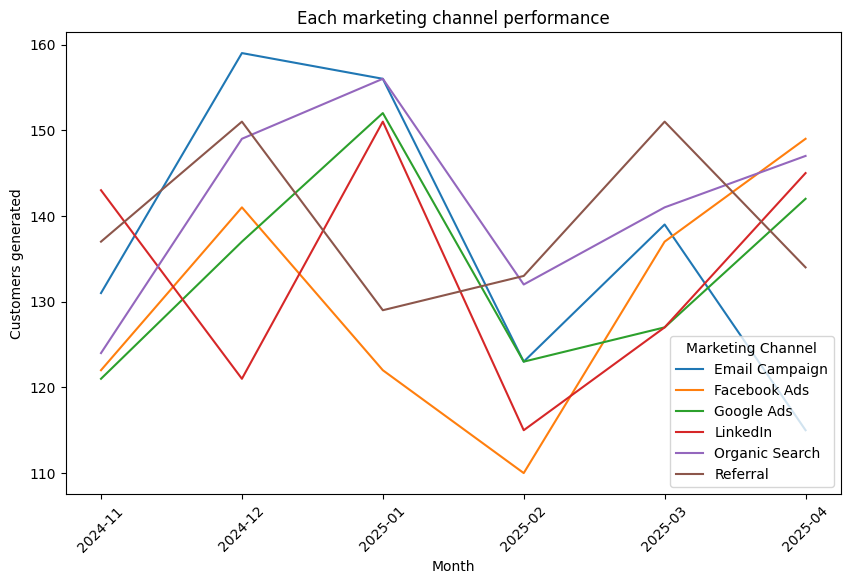

In [33]:


# Assuming 'df' is your DataFrame with 'Signup_Date' column
marketing_data['Signup_Date'] = pd.to_datetime(marketing_data['Signup_Date'])  # Convert to datetime if not already

# Extract the month and year from Signup_Date and convert it to string format
marketing_data['Signup_Month'] = marketing_data['Signup_Date'].dt.to_period('M').astype(str)

# Filter the data for the last 6 months (Nov 2024 - Mar 2025)
start_date = '2024-11'
end_date = '2025-04'

filtered_marketing_data = marketing_data[(marketing_data['Signup_Month'] >= start_date) & (marketing_data['Signup_Month'] <= end_date)]

# Group the data by 'Signup_Month' and 'Marketing_Channel' to aggregate Acquisition_Cost
monthly_channel_data = filtered_marketing_data.groupby(['Signup_Month', 'Marketing_Channel']).agg({
    'Customer_ID': 'count'
}).reset_index()

# Visualize Acquisition Cost over time by marketing channel
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_channel_data, x='Signup_Month', y='Customer_ID', hue='Marketing_Channel')
plt.title('Each marketing channel performance')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Customers generated')
plt.legend(title='Marketing Channel')
plt.show()

In [27]:
avg_new_cust = marketing_data.groupby('Signup_Month')['Customer_ID'].count().mean()

avg_new_cust

714.2857142857143

In [ ]:
marketing_data = marketing_data[marketing_data['Signup_Date'].dt.to_period('M') != '2025-05']

In [35]:
marketing_data.groupby(['Marketing_Channel'])['Customer_ID'].count()



Marketing_Channel
Email Campaign    823
Facebook Ads      781
Google Ads        802
LinkedIn          802
Organic Search    849
Referral          835
Name: Customer_ID, dtype: int64

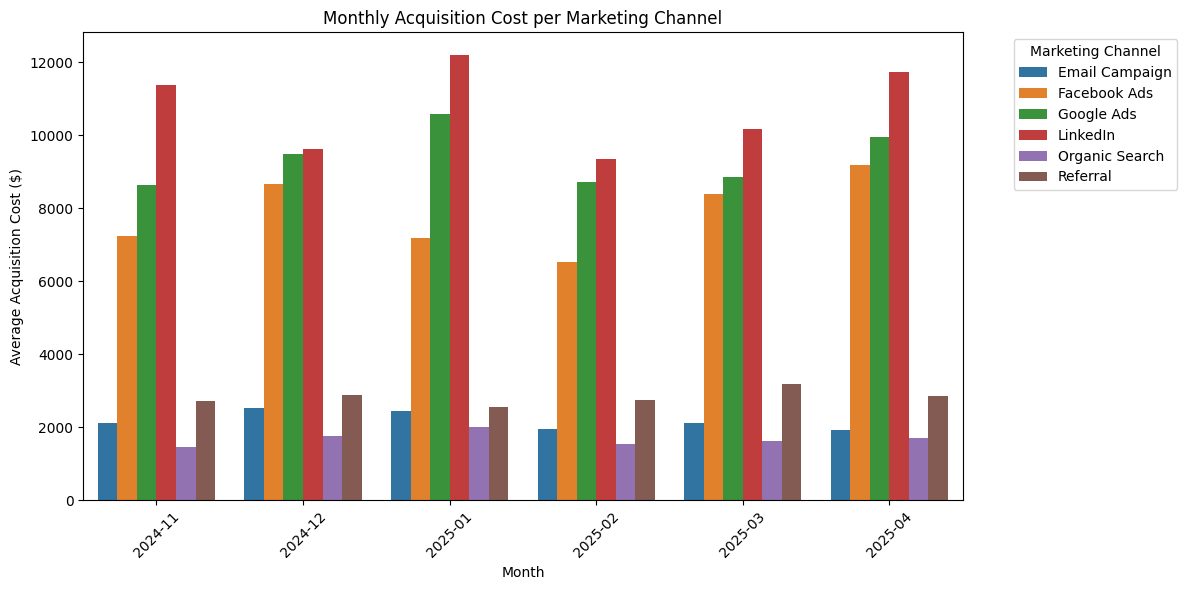

In [36]:
monthly_acq_cost = marketing_data.groupby(['Signup_Month', 'Marketing_Channel'])['Acquisition_Cost'].sum().reset_index()

# Set figure size
plt.figure(figsize=(12, 6))

# Create grouped barplot
sns.barplot(data=monthly_acq_cost, x='Signup_Month', y='Acquisition_Cost', hue='Marketing_Channel')

# Style it
plt.title('Monthly Acquisition Cost per Marketing Channel')
plt.xlabel('Month')
plt.ylabel('Average Acquisition Cost ($)')
plt.xticks(rotation=45)
plt.legend(title='Marketing Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/wd/rpkzwtfs7wsgdcggmt203sdw0000gn/T/ipykernel_6757/1566869686.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=overall_clv_by_channel, x='Marketing_Channel', y='Customer_Lifetime_Value', palette='muted')


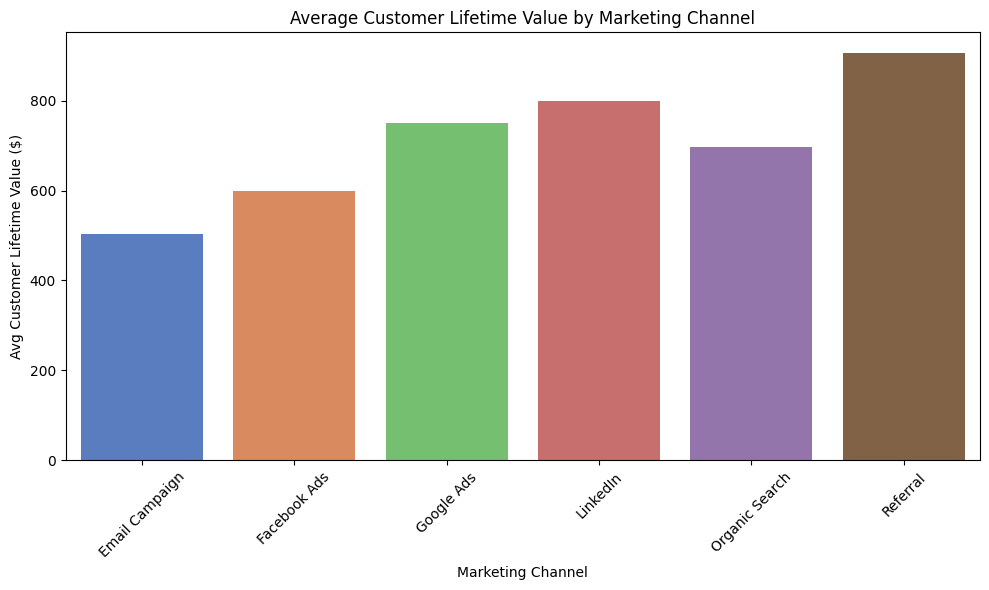

In [40]:
# Group by Marketing_Channel only, take mean CLV
overall_clv_by_channel = marketing_data.groupby('Marketing_Channel')['Customer_Lifetime_Value'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=overall_clv_by_channel, x='Marketing_Channel', y='Customer_Lifetime_Value', palette='muted')
plt.title('Average Customer Lifetime Value by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Avg Customer Lifetime Value ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
marketing_data.groupby(['Marketing_Channel'])['Customer_Lifetime_Value'].mean()

Marketing_Channel
Email Campaign    503.083208
Facebook Ads      598.083278
Google Ads        750.660686
LinkedIn          798.753479
Organic Search    697.716078
Referral          906.573150
Name: Customer_Lifetime_Value, dtype: float64

/var/folders/wd/rpkzwtfs7wsgdcggmt203sdw0000gn/T/ipykernel_6757/3598746309.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_by_channel, x='Marketing_Channel', y='Churned', palette='pastel')


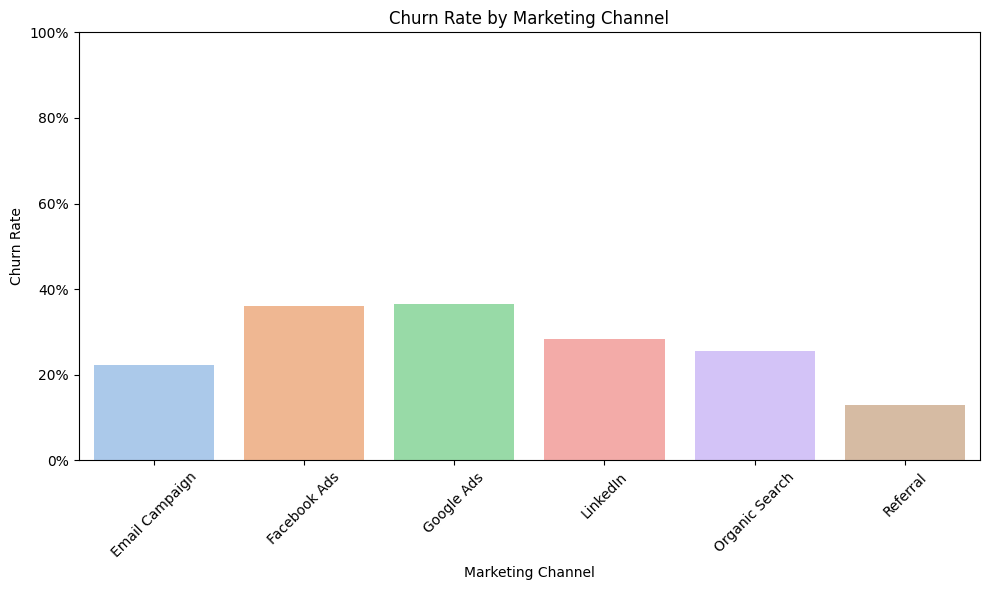

In [ ]:
import matplotlib.ticker as mtick

# Calculate churn rate per channel
churn_by_channel = marketing_data.groupby('Marketing_Channel')['Churned'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_by_channel, x='Marketing_Channel', y='Churned', palette='pastel')
plt.title('Churn Rate by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Churn Rate')

# Set Y-axis to display percentages
plt.ylim(0, 1)  # Keep the range from 0 to 1
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/wd/rpkzwtfs7wsgdcggmt203sdw0000gn/T/ipykernel_6757/2255289819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data['CLV_to_Acq_Cost_Ratio'] = marketing_data['Customer_Lifetime_Value'] / marketing_data['Acquisition_Cost']
/var/folders/wd/rpkzwtfs7wsgdcggmt203sdw0000gn/T/ipykernel_6757/2255289819.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clv_acq_ratio_by_channel, x='Marketing_Channel', y='CLV_to_Acq_Cost_Ratio', palette='muted')


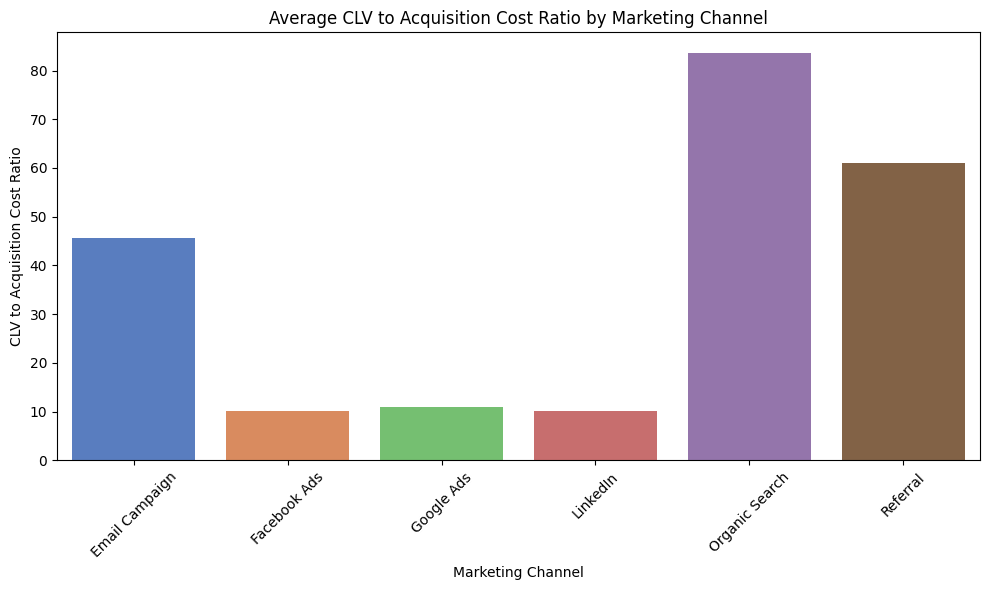

In [45]:
# Add a new column for the ratio of CLV to Acquisition Cost for each customer
marketing_data['CLV_to_Acq_Cost_Ratio'] = marketing_data['Customer_Lifetime_Value'] / marketing_data['Acquisition_Cost']

# Now group by Marketing_Channel to calculate the average ratio for each channel
clv_acq_ratio_by_channel = marketing_data.groupby('Marketing_Channel')['CLV_to_Acq_Cost_Ratio'].mean().reset_index()

# Plot the average ratio for each marketing channel
plt.figure(figsize=(10, 6))
sns.barplot(data=clv_acq_ratio_by_channel, x='Marketing_Channel', y='CLV_to_Acq_Cost_Ratio', palette='muted')
plt.title('Average CLV to Acquisition Cost Ratio by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('CLV to Acquisition Cost Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
marketing_data.groupby(['Marketing_Channel'])['Customer_Lifetime_Value'].mean()

Marketing_Channel
Email Campaign    503.083208
Facebook Ads      598.083278
Google Ads        750.660686
LinkedIn          798.753479
Organic Search    697.716078
Referral          906.573150
Name: Customer_Lifetime_Value, dtype: float64

In [53]:
marketing_data.groupby(['Marketing_Channel'])['CLV_to_Acq_Cost_Ratio'].mean()


Marketing_Channel
Email Campaign    45.669204
Facebook Ads      10.202457
Google Ads        10.945001
LinkedIn          10.110690
Organic Search    83.661840
Referral          61.006847
Name: CLV_to_Acq_Cost_Ratio, dtype: float64

In [54]:
marketing_data.groupby(['Marketing_Channel'])['Churned'].mean()

Marketing_Channel
Email Campaign    0.223572
Facebook Ads      0.361076
Google Ads        0.364090
LinkedIn          0.284289
Organic Search    0.255595
Referral          0.128144
Name: Churned, dtype: float64